# 3-Programming Exercise 1: Linear Regression Coursera

### The same task but with Tensorflow and Keras 

**The first file manual_linea_regression has some of handling so we complete in implement the task**

In [2]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt 
import pandas as pd
from manual_linea_regression import init_2d_graphs, ploting_2d_data,features_normalization_with_std

##  Read CSV file

In [3]:
df_file = pd.read_csv('csv_files/ex1data1.csv')
df_file.head()

,city_population,food_truck_profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


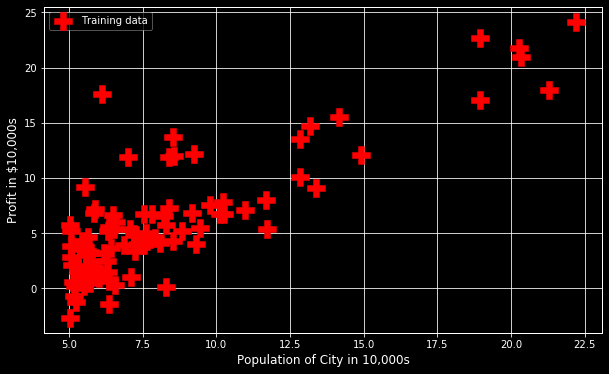

In [4]:
# our initialized and graph draw for our dataset
X = df_file['city_population'] # x_axis
Y = df_file['food_truck_profit'] # y_axis
m = len(Y)
# because y is shape (97,) whcih rank of 0 and we need to be (97,1) to subtract from y_hat
Y = Y.values.reshape(m,1) # because of type Series we use .values
# X = X.values.reshape(len(X),1) # because of type Series we use .values

x_label = 'Population of City in 10,000s'
y_label = 'Profit in $10,000s'
graph_legend = 'Training data'
# the labels of x & y

init_2d_graphs('ggplot', 'dark_background' )
plt.scatter(X,Y, s=300, c='red', marker='P', label=graph_legend)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()

In [5]:
X = (np.stack((X, np.ones(m)), axis=1))

### But initialized is different in tensorflow

In [9]:
tf.compat.v1.disable_eager_execution()
# X & y will be applied later when the algorith run
x = tf.compat.v1.placeholder(tf.float64)
y = tf.compat.v1.placeholder(tf.float64)

# we have one features so we need thetas to be 2*1
thetas = tf.compat.v1.Variable(np.zeros((2,1)), tf.float64)
all_cost = []
all_weights = []
all_weights.append(np.zeros((2,1))) # values of thetas
Alpha = tf.compat.v1.Variable(.01, tf.float64)
iterations = 1500

## Hypothesis Function

In [10]:
y_hat = tf.matmul(x, thetas)

## Cost function

In [11]:
cost_function =  tf.reduce_sum(tf.pow(y_hat - y,2)) * (1/(2*m))

In [12]:
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    # test the cost function
    cost = sess.run(cost_function, {x:X, y:Y})
    all_cost.append(cost)
    print(cost)

32.072733877455676


## Gradient Descent

In [13]:
LRModel = tf.compat.v1.train.GradientDescentOptimizer(Alpha).minimize(cost_function)

## Run the model to minimize cost function

In [14]:
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    for i in range(iterations):
        sess.run(LRModel, {x:X, y: Y})
        cost = sess.run(cost_function, {x:X, y:Y})
        we = sess.run(thetas)
        all_cost.append(cost)
        all_weights.append(we)
    last_cost = sess.run(cost_function, {x:X, y:Y})
    last_weights = sess.run(thetas)

In [15]:
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

In [16]:
print("Our cost function after 1000 iterations is: ", last_cost)

Our cost function after 1000 iterations is:  4.483388257364758


Text(0, 0.5, 'Profit in $10,000s')

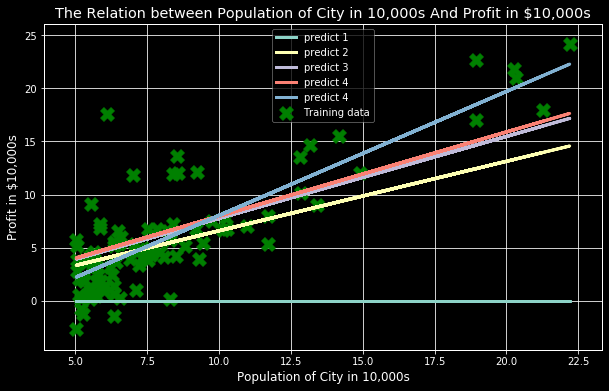

In [17]:
# Plot the graph with different first 4 values of thetas and last values of thetas
init_2d_graphs('ggplot', 'dark_background' ) # initialize graphics size
for i in range(4):
    prediction = np.matmul(X, all_weights[i])
    plt.plot(X[:,0], prediction, label='predict ' + str(i+1), linewidth=3)
prediction = np.matmul(X, last_weights)
plt.plot(X[:,0], prediction, label='predict ' + str(i+1), linewidth=3)
plt.scatter(X[:,0],Y, s = 200, c = 'green', marker = 'X', label =  'Training data')
plt.title("The Relation between " + 'Population of City in 10,000s' + " And " + 'Profit in $10,000s' )
plt.legend()
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

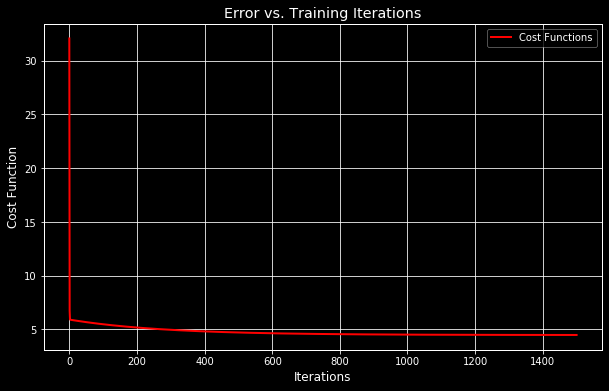

In [18]:
init_2d_graphs() # initialize graphics size
plt.plot(np.arange(1501), all_cost, 'r', label='Cost Functions', linewidth=2) 
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title('Error vs. Training Iterations')
plt.legend()

#  linear regression with multiple variables

##  Read CSV file

In [19]:
df_file = pd.read_csv('csv_files/ex1data2.csv')
df_file.head()

,house_size,number_of_bedrooms,house_price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## fetures normalization

In [20]:
df_file = features_normalization_with_std(df_file)

In [21]:
X = np.array(df_file.iloc[:, :2])# get the 2 features columns)
Y = df_file['house_price'] # the real output 

# # because y is shape (97,) whcih rank of 0 and we need to be (97,1) to subtract from y_hat
Y = Y.values.reshape(len(Y),1) # because of type Series we use .values

# variables and parameters initialize
all_cost = []
m = len(Y) 
print(X.shape)
print("#"*80)
print("Number of training example: ", m)
print("#"*80)
Alpha = .1 # learning rate
iterations = 100 # number of gradient descent iterations
thetas = np.zeros((3,1)) # initialize threats as 2d array and 2*1 dimension with 0 values
print('Theats shape is: ', thetas.shape)
print("#"*80)
print('Theats values are: ', thetas)
print("#"*80)


(47, 2)
################################################################################
Number of training example:  47
################################################################################
Theats shape is:  (3, 1)
################################################################################
Theats values are:  [[0.]
 [0.]
 [0.]]
################################################################################


In [22]:
X = np.c_[X, np.ones((m,1))] # add column of bais

###  initialized tensors

In [23]:
tf.compat.v1.disable_eager_execution()
# X & y will be applied later when the algorith run
x = tf.compat.v1.placeholder(tf.float64)
y = tf.compat.v1.placeholder(tf.float64)

# we have multi-features so we need thetas to be 3*1
thetas = tf.compat.v1.Variable(np.zeros((3,1)), tf.float64)
all_weights = []
all_weights.append(np.zeros((3,1))) # values of thetas
Alpha = tf.compat.v1.Variable(.01, tf.float64)
iterations = 1500

## Hypothesis Function

In [24]:
y_hat = tf.matmul(x, thetas)

## Cost function

In [25]:
cost_function =  tf.reduce_sum(tf.pow(y_hat - y,2)) * (1/(2*m))

In [26]:
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    # test the cost function
    cost = sess.run(cost_function, {x:X, y:Y})
    all_cost.append(cost)
    print(cost) # small value because of normaliztion step

0.5


## Gradient Descent

In [27]:
LRModel = tf.compat.v1.train.GradientDescentOptimizer(Alpha).minimize(cost_function)

## Run the model to minimize cost function

In [28]:
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    for i in range(iterations):
        sess.run(LRModel, {x:X, y: Y})
        cost = sess.run(cost_function, {x:X, y:Y})
        we = sess.run(thetas)
        all_cost.append(cost)
        all_weights.append(we)
    last_cost = sess.run(cost_function, {x:X, y:Y})
    last_weights = sess.run(thetas)

In [29]:
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

In [30]:
print("Our cost function after 1000 iterations is: ", last_cost)

Our cost function after 1000 iterations is:  0.1335276647713807
